# Introduction to Broadcasting

Broadcasting was introduced in the supplemental notebook that was part of Notebook 10. 

Additionally, broadcasting is used in the Setup cells of Notebook 13 (Logistic Regression), referencing back to Notebook 10.

The purpose here is to do a bit of a deeper introduction to how broadcasting works.

## Before we get to broadcasting, however, we will take a small detour, to review Universal Functions (unfunc's) in Numpy, which we introduced in the last session.

From the documentation:  A universal function (or ufunc for short) is a function that operates on ndarrays 
    in an element-by-element fashion, supporting array broadcasting, type casting, and several other standard features. 
    That is, a ufunc is a “vectorized” wrapper for a function that takes a fixed number of specific inputs 
    and produces a fixed number of specific outputs.
    
The key thing to remember is that these are functions that operate **element by element** on whole arrays. We are doing the same operation to every element in the array.

#### Here is the link to the documentation of the available ufuncs:

https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs

The ufuncs are classified as mathematical, trigonometric, bitwise, comparison, and floating functions.

And you should see from the functions themselves that they will be operating individually on each element of an array.

In [ ]:
# an example of ufunc
import numpy as np

In [ ]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
display(a + b)
display(np.add(a,b))

In [ ]:
# from the supplemental notebook
from numpy.random import default_rng
rng = default_rng()

A = rng.integers(-10, 10, size=(4, 3)) # return random integers from -10 (inclusive) to 10 (exclusive)
print(A, "\n==>\n", np.abs(A))

In [ ]:
B = rng.integers(-10, 10, size=A.shape)
print(B)
C = np.maximum(A, B) # elementwise comparison
print("\n==>\n", C)

### Now that we see how these element-wise operations function, let's see how broadcasting works.

 Broadcasting is simply a set of rules for applying binary 
    ufuncs (e.g., addition, subtraction, multiplication, etc.) on **arrays of different sizes.**
    
https://numpy.org/doc/stable/user/basics.broadcasting.html#general-broadcasting-rules

From the documentation:

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. **Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.** Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. 

#### Recall the arrays a and b from above.

In [ ]:
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])
display(a * b)
display(np.multiply(a,b))

In [ ]:
# now use broadcasting
display(a * 2)

So what happened here? The array shapes are different, but we are able to apply the element-wise function of
multiply, because we have met (one of) the rules of broadcasting.

### General Broadcasting Rules
(again, from the documentation):

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

   **they are equal, or**

   **one of them is 1.**

If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes.

Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays. 

Note that missing dimensions are assumed to have size one (scalars).

#### Let's see how these rules were applied in the above example.

The variable "a" is an ndarray of size [3,1]. 

The variable "b" is a scalar, which is assumed to have a size of 1.

So the second rule above applies. Technically, a and b have different shapes: the former is a  3x1 matrix, while the latter is a scalar (1×1). However, they are compatible because Numpy knows how to extend---or broadcast---the value 2 into an equivalent matrix object of the same shape in order to combine them.

This is the simplest example of broadcasting, in that the scalar "b" is stretched to become an array of same shape as "a" so the shapes are compatible for element-by-element multiplication.

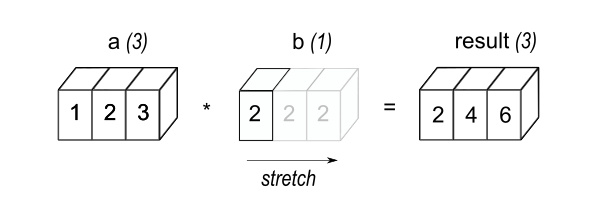

Here is another way of understanding the two rules (from VanderPlas):

Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [ ]:
c = np.arange(3)  
d = np.arange(3)[:, np.newaxis]

print(c)
print(d)

print(c.shape)
print(d.shape)

In [ ]:
c + d

"a" is an array of size 3, and "b" is a 3x1 array. We start with the trailing/rightmost dimension of each array, which is 1 for array "d". The dimension second dimension of "b" then matches the dimension of "a", so they are compatible.

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched both a and b to match a common shape, and the result is a two-dimensional array. See the graphic below to represent what occurred.

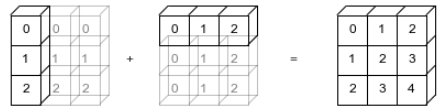

The light boxes represent the broadcasted values. This extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

Recall in our introduction to numpy and pandas, we discussed that, in this class, we will always use arrays of at least two dimensions, and that a single row or column array would be size (m x n), where either m or n is equal to 1. 

So we will not be using an array such as "a" as in the example above. The example above was to allow you to visualize the dimension stretching.

So let's look at a few other examples, using (m x n) arrays.

In [ ]:
e = np.ones((3,2))
f = np.ones((3,1))

print(e.shape)
print(f.shape)

In [ ]:
g = e + f
print(g)
print(g.shape)


#### In this example, Rule 2 applied, because the array "f" has the size of 1 in its second dimension, so it is stretched to be the same size as array "e".

In [ ]:
h = np.ones((3,2))
i = np.ones((1,2))

print(h.shape)
print(i.shape)

In [ ]:
j = h + i
print(j)
print(j.shape)

#### So what happened here? Recall from the documentation and above:

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

**they are equal, or**

**one of them is 1.**

So we started from the right and compared dimensions. Both of them are of size 2 in the second dimension, so we can continue our right-to-left comparison. In the first dimension, "i" is of size 1, so both rules are met and the smaller array is "stretched", or broadcast, across the larger array for the element by element operation (addition, in this case).

#### Now let's look at an example in which both arrays must be broadcast:

In [ ]:
x = np.ones((3,1))
y = np.ones((1,3))

display(x)
display(y)

print(x.shape)
print(y.shape)

In [ ]:
z = x + y
print(z)
print(z.shape)

### Now let's look at a bit more sophisticated example, from our broadcasting section in NB 10:

In [ ]:
from numpy.random import default_rng
rng = default_rng()

A = rng.integers(-10, 10, size=(4, 3)) # return random integers from -10 (inclusive) to 10 (exclusive)
print(A)

Suppose each row `A[i, :]` are the coordinates of a data point, and we want to compute the centroid of all the data points (or center-of-mass, if we imagine each point is a unit mass). That's the same as computing the mean coordinate for each column:

In [ ]:
A_row_means = np.mean(A, axis=0)

print(A, "\n=>\n", A_row_means)

### Centering an Array

Now, suppose you want to shift the points so that their mean is zero. This operation is called centering the array.

Even though they don't have the same shape, Numpy will interpret A - A_row_means as precisely this operation, effectively extending or "replicating" A_row_means into rows of a matrix of the same shape as A, in order to then perform elementwise subtraction.

In [ ]:
display(A.shape)
display(A_row_means.shape)

A_row_centered = A - A_row_means
A_row_centered

To double-check that we've done this correctly, we can check that the centered array has near zero mean:

In [ ]:
A_row_centered.mean()  # mean of the entire array

In [ ]:
A_row_centered.mean(0) # row-centered mean

Now, suppose you instead want to mean-center the _columns_ instead of the rows. You could start by computing column means:

In [ ]:
A_col_means = np.mean(A, axis=1)

print(A, "\n=>\n", A_col_means)

But the same operation will fail!

In [ ]:
# A - A_col_means # Fails!

The error reports that these shapes are not compatible. So how can you fix it?

**Broadcasting rule.** One way is to learn Numpy's convention for **[broadcasting](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#broadcasting)**. Numpy starts by looking at the shapes of the objects:

In [ ]:
print(A.shape, A_row_means.shape)

These are compatible if, starting from _right_ to _left_, the dimensions match **or** one of the dimensions is 1. This convention of moving from right to left is referred to as matching the _trailing dimensions_. In this example, the rightmost dimensions of each object are both 3, so they match. Since `A_row_means` has no more dimensions, it can be replicated to match the remaining dimensions of `A`.

By contrast, consider the shapes of `A` and `A_col_means`:

In [ ]:
print(A.shape, A_col_means.shape)

In this case, per the broadcasting rule, the trailing dimensions of 3 and 4 do not match. Therefore, the broadcast rule fails. To make it work, we need to modify `A_col_means` to have a unit trailing dimension. Use Numpy's [`reshape()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) to convert `A_col_means` into a shape that has an explicit trailing dimension of size 1.

In [ ]:
A_col_means2 = np.reshape(A_col_means, (len(A_col_means), 1))
print(A_col_means2, "=>", A_col_means2.shape)

Now the trailing dimension equals 1, so it can be matched against the trailing dimension of `A`. The next dimension is the same between the two objects, so Numpy knows it can replicate accordingly.

In [ ]:
print("A - A_col_means2\n\n", A, "\n-", A_col_means2) 
print("\n=>\n", A - A_col_means2)

Recall when we introduced Numpy in Week 9, we spoke about the importance of understanding array shapes. Here is another example of why this understanding is so important.

Notebook 14 in particular provides opportunities to use broadcasting functionality (see Exercise 2, for example).